<a href="https://colab.research.google.com/github/iitmstudent-2021/Machine_Learning_House_Price_Prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing the Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

#Importing the Boston House Price Dataset

In [3]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
house_price_dataset = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

In [4]:
house_price_dataset

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


In [5]:
print(house_price_dataset )

             0      1      2    3      4      5     6       7    8      9   \
0       0.00632  18.00   2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1     396.90000   4.98  24.00  NaN    NaN    NaN   NaN     NaN  NaN    NaN   
2       0.02731   0.00   7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
3     396.90000   9.14  21.60  NaN    NaN    NaN   NaN     NaN  NaN    NaN   
4       0.02729   0.00   7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
...         ...    ...    ...  ...    ...    ...   ...     ...  ...    ...   
1007  396.90000   5.64  23.90  NaN    NaN    NaN   NaN     NaN  NaN    NaN   
1008    0.10959   0.00  11.93  0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
1009  393.45000   6.48  22.00  NaN    NaN    NaN   NaN     NaN  NaN    NaN   
1010    0.04741   0.00  11.93  0.0  0.573  6.030  80.8  2.5050  1.0  273.0   
1011  396.90000   7.88  11.90  NaN    NaN    NaN   NaN     NaN  NaN    NaN   

        10  
0     15.3  
1      NaN  
2     17.8  
3      NaN 

In [6]:
house_price_dataset.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8


In [7]:
import pandas as pd
import numpy as np
import requests

# Load data from the URL
url = "https://lib.stat.cmu.edu/datasets/boston"
response = requests.get(url)
data = response.text

# Parse the dataset
lines = data.split("\n")[22:]  # Skip header lines

# Separate features and targets
features = []
targets = []

for i in range(0, len(lines), 2):  # Process in pairs of lines
    if lines[i].strip():  # Skip empty lines
        # Combine the two rows of features (13 values split across two rows)
        row = lines[i].split() + lines[i + 1].split() if (i + 1 < len(lines) and lines[i + 1].strip()) else []
        features.append(row[:13])  # First 13 columns are features
        targets.append(row[13:])  # Remaining columns are targets

# Convert to NumPy arrays
features = np.array(features, dtype=float)
targets = np.array(targets, dtype=float).flatten()

# Create a DataFrame
columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"
]
boston_df = pd.DataFrame(features, columns=columns)
boston_df['PRICE'] = targets

# Display the first few rows
print(boston_df.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


In [8]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


#Checking the number of rows and Columns in the data frame

In [9]:
boston_df.shape

(506, 14)

#Checking for missing values

In [10]:
boston_df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


#Statistical measures of the Dataset

In [11]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#Understanding the Corelation betwwn various features in the DATASET

Two types:- 1) Positive Correlation 2) Negative Correlation

In [12]:
correlation = boston_df.corr()

#Constructing the heatmap to understand the correlation

<Axes: >

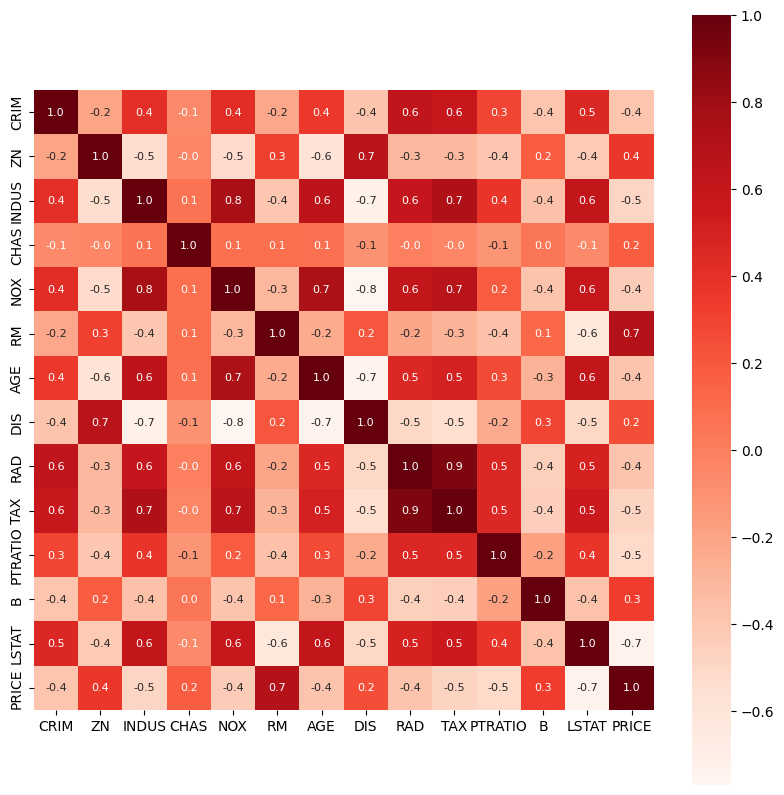

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Reds')

#Splitting the data and target

In [14]:
X = boston_df.drop(['PRICE'], axis = 1)
Y = boston_df['PRICE']

In [15]:
print(X)
print(Y)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

#Splitting the Data into Training and Testing Data

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [17]:
print(X.shape, X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


#Model Training

#XGBoost Regressor : It is a Decision Tree type Ensemble Technique

In [18]:
pip install xgboost==1.7.6 scikit-learn==1.2.2


In [19]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Example data splitting
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize and train the model
model = XGBRegressor()
model.fit(X_train, Y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 6.560527271813469


In [20]:
model = XGBRegressor()

In [21]:
# training the model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

#Evaluation

Accuracy for prediction on training data

In [22]:
training_data_prediction = model.predict(X_train)

In [23]:
training_data_prediction

array([12.006792 , 19.914322 , 19.41386  , 13.41272  , 18.233686 ,
       24.599525 , 21.084385 , 24.691845 ,  8.696693 , 27.479736 ,
       20.694065 , 36.1663   , 31.603483 , 11.695366 , 39.791046 ,
       13.88976  , 21.810648 , 23.713993 , 17.597576 , 24.410297 ,
        8.793519 , 19.173897 , 25.288088 , 20.433308 , 23.098907 ,
       37.891342 , 15.598552 , 45.398563 , 15.698146 , 22.600924 ,
       14.546442 , 18.711456 , 17.798622 , 16.106794 , 20.609913 ,
       31.608261 , 29.09079  , 15.603799 , 17.517525 , 22.501944 ,
       19.392653 , 19.290897 ,  8.49561  , 20.603264 , 16.995317 ,
       17.08292  , 14.509991 , 49.995197 , 14.281856 , 12.59869  ,
       28.704367 , 21.207237 , 19.308727 , 23.09419  , 19.099642 ,
       25.001644 , 33.402706 ,  5.00865  , 29.600845 , 18.669462 ,
       21.661974 , 23.051264 , 22.805435 , 20.95566  , 48.781216 ,
       14.632303 , 16.598646 , 27.074171 , 20.081707 , 19.794664 ,
       21.010654 , 41.29935  , 23.153635 , 20.358414 , 18.5552

#R Square Error

In [24]:
score_1 = metrics.r2_score(Y_train, training_data_prediction)

In [25]:
score_1

0.9999953622164942

#Mean Absolute Error

In [27]:
score_2 = metrics.r2_score(Y_train, training_data_prediction)

In [28]:
score_2

0.9999953622164942

#Prediction on Test Data

In [29]:
test_data_prediction = model.predict(X_test)

In [30]:
test_data_prediction

array([23.25328  , 30.024755 , 15.632249 , 23.313478 , 17.775118 ,
       21.142563 , 20.19583  , 15.010124 , 21.23614  , 22.242369 ,
       20.457346 , 19.209145 ,  8.551788 , 21.210636 , 20.696491 ,
       26.74365  , 18.824339 , 10.525872 , 45.68885  , 14.116162 ,
       26.618996 , 24.94542  , 13.3510275, 20.87231  , 15.400073 ,
       15.636547 , 22.324673 , 12.777009 , 20.726126 , 22.56401  ,
       20.346395 , 22.303246 , 18.523277 , 21.764612 , 15.568828 ,
       15.683646 , 33.073547 , 19.115112 , 21.955132 , 22.399914 ,
       18.998787 , 31.328337 , 43.464993 , 18.20766  , 22.09233  ,
       14.353467 , 14.607512 , 22.716745 , 19.700527 , 27.072327 ,
       22.579268 , 35.133675 , 16.241447 , 25.214682 , 46.013332 ,
       21.89786  , 15.043295 , 32.93268  , 20.53731  , 16.568089 ,
       24.07178  , 34.34796  , 28.542194 , 16.977676 , 25.867334 ,
       15.649837 , 13.039615 , 23.00082  , 27.26897  , 15.414835 ,
       21.546648 , 31.72919  , 10.665012 , 20.770847 , 21.8483

In [35]:
score_1 = metrics.r2_score(Y_test, test_data_prediction)

In [36]:
score_1

0.9105388132305845

In [37]:
score_2 = metrics.r2_score(Y_test, training_data_prediction)

ValueError: Found input variables with inconsistent numbers of samples: [102, 404]

In [38]:
score_2

0.9999953622164942

#Visualization the actual price and predicted prices

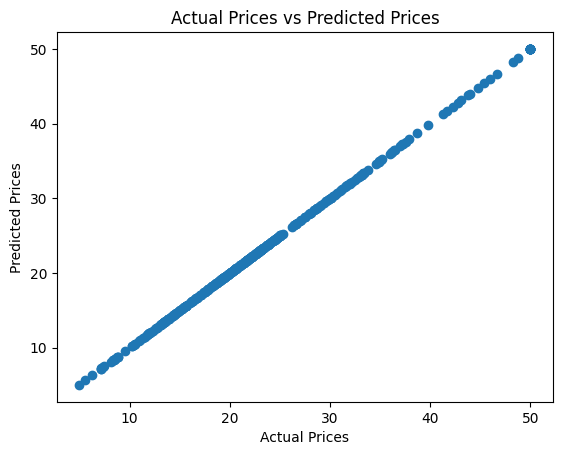

In [39]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()